In [1]:
import pandas as pd

In [2]:
replies_df = pd.read_csv('./replies_df.csv')

In [3]:
sentences_arr = replies_df.reply.values.astype('U')

In [4]:
sentences_arr[:2]

array(["Hi stao, the response of the T64fx changes depending on the the blade you're using. Usually I have a Primorac Carbon and I'm offensive player with agressive top spin. I used T05fx before and I really appreciate the general feeling of the T64fx, which is more softer but faster than 05fx. On the other hand less spin too. Very good for block. For my style I really prefer T64fx than T05fx ( always 2.1 for me).I bought recently the complete Garaydia family to see if from the blade I had a possibility to improve my skills and I would say no.With the ALC it is too soft and slow for me, with the T5000 too fast and the ZLC has a softer touch and could be an alternative. I'm truly amazed about the huge difference between those 3 blades.To finish I'm currently glueing a Dignics 05 on my Primorac carbon to test as the season ended. after a training I'll see if it fits for me or if I have to test it with the garaydia T5000 or Garaydia ZLC as I'm seeking more spin...",
       "I'm also inter

In [5]:
sentences_arr[-2:]

array(["Thanks for your reply! I've used haifu whale II before, its definately heavier than H3 neo! Although I found the haifu is more powerful in speed, I prefer the H3 for its feel and spin. So I like to keep the H3 neo for f/h, but wonder what rubber would be spinny and light for the rpb side?",
       'Non-tacky rubbers are better for RPB usually.The Chinese like a tacky FH rubber and a non-tacky RPB rubber.Two tacky rubbers will also make the set up a bit heavy for CPen.'],
      dtype='<U4918')

In [22]:
# https://pythonprogramminglanguage.com/kmeans-text-clustering/
# https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

# making idf vector then cluster

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(sentences_arr)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

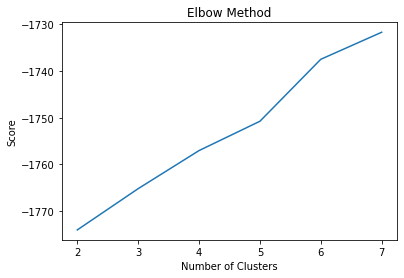

In [36]:
# using elbow method to determine number of clusters

number_clusters = range(2, 8)

kmeans = [KMeans(n_clusters=i, max_iter = 100) for i in number_clusters]

score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]

import matplotlib.pyplot as plt
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# need to be alot higher number of clusters

In [24]:
# using elbow method to determine number of clusters

number_clusters = range(5, 55,10)

kmeans = [KMeans(n_clusters=i, max_iter = 100) for i in number_clusters]

score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]

In [25]:
print(score)

[-1749.3218996820656, -1691.380715699877, -1657.869818116997, -1634.6304615494419, -1611.5559872491508]


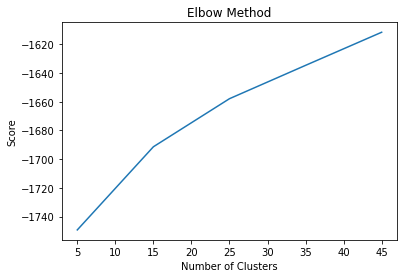

In [26]:
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# score still not really plateauing
# let's just pick a cluster of 15

In [44]:
k = 15
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_array)

#print("Top terms per cluster:")

# argsort with desc - so the first few terms are the top terms
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

cluster_terms = []

for i in range(k):
    # print("Cluster %d:" % i),
    cluster_i = []
    for ind in order_centroids[i, :]:
        cluster_i.append(terms[ind])
        # print(' %s' % terms[ind]),
    cluster_terms.append(cluster_i)
    #print()

Top terms per cluster:


In [52]:
# get the top 20 terms for each cluster

for idx,val in enumerate(cluster_terms):
    print("Cluster %d:" % idx)
    for ind in val[:20]: # top 20
        print(' %s' % ind)
    print()

Cluster 0:
 neo
 h3
 commercial
 sponge
 boost
 rubber
 boosted
 use
 hurricane
 provincial
 national
 tg3
 non
 rubbers
 battle
 china
 better
 tacky
 like
 blue

Cluster 1:
 thanks
 rubbers
 try
 good
 don
 like
 think
 thank
 know
 just
 really
 tried
 new
 time
 people
 lot
 ok
 ll
 yes
 difference

Cluster 2:
 mx
 t05
 like
 play
 t80
 t64
 rubber
 t05h
 rubbers
 hard
 good
 used
 use
 way
 try
 h3
 spin
 backhand
 better
 don

Cluster 3:
 spin
 rubbers
 speed
 ball
 hard
 soft
 sponge
 harder
 better
 rubber
 like
 good
 easier
 control
 softer
 sound
 bit
 chinese
 play
 backhand

Cluster 4:
 glue
 layers
 layer
 blade
 rubber
 watery
 use
 gluing
 water
 speed
 residue
 oil
 need
 wbg
 ox
 process
 ga
 roller
 neo
 based

Cluster 5:
 sponge
 blue
 version
 www
 national
 battle
 com
 provincial
 http
 orange
 729
 h3
 hardness
 versions
 tabletennisdaily
 40
 rubber
 commercial
 better
 ttnpp

Cluster 6:
 blade
 hurricane
 dhs
 rubbers
 like
 rubber
 fast
 good
 blades
 fh
 use

In [62]:
# to see the top 50 terms in cluster 0
print(cluster_terms[0][:50])

['neo', 'h3', 'commercial', 'sponge', 'boost', 'rubber', 'boosted', 'use', 'hurricane', 'provincial', 'national', 'tg3', 'non', 'rubbers', 'battle', 'china', 'better', 'tacky', 'like', 'blue', 'difference', 'really', 'chinese', 'does', 'dhs', '39', 'using', 'try', 'haifu', 'compare', 'used', 'tg2', 'booster', 'old', 'layers', 'h8', 'h3n', 'player', 'way', 'skyline', 'vega', 'want', '999', 'degree', 'h2', 'whale', 'actually', 'super', 'cnt', 'boosting']


# PCA first then K-mean

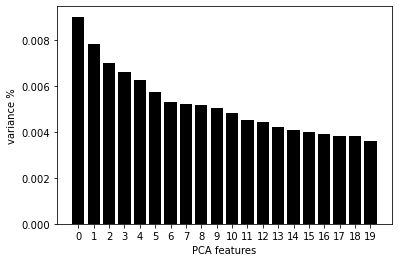

In [53]:
from sklearn.decomposition import PCA
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(tf_idf_array)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

# possibly 4/5 pca copmonents?

Text(0, 0.5, 'PCA 2')

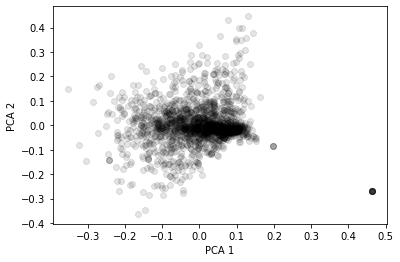

In [74]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# looking at just the top 2 PCA since can only see 2 in a graph

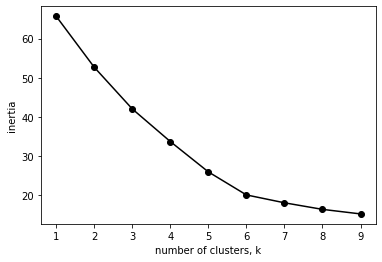

In [75]:
pca_n = 5 # only want the first 4 pca comp

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:pca_n]) 
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# looks like an elbow of 6

In [76]:
pca_n = 5
k = 6

Y_sklearn = sklearn_pca.fit_transform(PCA_components.iloc[:,:pca_n]) 
test_e = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)

fitted = test_e.fit(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)


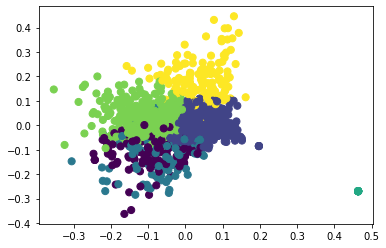

In [77]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

In [ ]:
# but also by reducing the components, cannot see the words anymore